# Activity: Explore confidence intervals

## Introduction

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above. <br>

You've just started your new role as a data analyst in the Strategy division of Ripple Renewable Energy (RRE). **RRE operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`.** You've been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

Your manager has requested that you do the following for your analysis:
1. Provide a summary of the mean AQI for the states in which RRE operates.
2. Construct a boxplot visualization for AQI of these states using `seaborn`.
3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
4. Construct a confidence interval for the RRE state with the highest mean AQI.

## Step 1: Imports

### Import packages

Import `pandas` and `numpy`.

In [1]:
# Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Load the dataset

The dataset provided gives national Air Quality Index (AQI) measurements by state over time.  `Pandas` is used to import the file `c4_epa_air_quality.csv` as a DataFrame named `aqi`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

*Note: For the purposes of your analysis, you can assume this data is randomly sampled from a larger population.*

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA
aqi = pd.read_csv('c4_epa_air_quality.csv', parse_dates=['date_local'])

## Step 2: Data exploration

### Explore your dataset

Before proceeding to your deliverables, spend some time exploring the `aqi` DataFrame. 

In [3]:
aqi.drop('Unnamed: 0', axis=1, inplace=True)
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_local        260 non-null    datetime64[ns]
 1   state_name        260 non-null    object        
 2   county_name       260 non-null    object        
 3   city_name         260 non-null    object        
 4   local_site_name   257 non-null    object        
 5   parameter_name    260 non-null    object        
 6   units_of_measure  260 non-null    object        
 7   arithmetic_mean   260 non-null    float64       
 8   aqi               260 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 18.4+ KB


In [4]:
aqi.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


In [5]:
# Explore your DataFrame `aqi`.
aqi.describe(include='all')

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260,260,260,260,257,260,260,260.000000,260.000000
unique,1,52,149,190,253,1,1,NaN,NaN
top,2018-01-01 00:00:00,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,260,66,14,21,2,260,260,NaN,NaN
first,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000


In [6]:
print('Distribution between states as following:')
print(aqi['state_name'].value_counts())

Distribution between states as following:
California              66
Arizona                 14
Ohio                    12
Florida                 12
Texas                   10
New York                10
Pennsylvania            10
Michigan                 9
Colorado                 9
Minnesota                7
New Jersey               6
Indiana                  5
North Carolina           4
Massachusetts            4
Maryland                 4
Oklahoma                 4
Virginia                 4
Nevada                   4
Connecticut              4
Kentucky                 3
Missouri                 3
Wyoming                  3
Iowa                     3
Hawaii                   3
Utah                     3
Vermont                  3
Illinois                 3
New Hampshire            2
District Of Columbia     2
New Mexico               2
Montana                  2
Oregon                   2
Alaska                   2
Georgia                  2
Washington               2
Idaho        

**Question:** What time range does this data cover?

- All of the sites collected data on 01-Jan-2018

**Question:** What are the minimum and maximum AQI values observed in the dataset?

- The minimum AQI is 0 and maximum AQI is 50

**Question:** Are all states equally represented in the dataset?

- Not all states are equally represented. California has 66 sites that reported AQI for this dataset, while states such as Delaware and Alabama have only one site that reported AQI.

## Step 3: Statistical tests

### Summarize the mean AQI for RRE states

Start with your first deliverable. Summarize the mean AQI for the states in which RRE operates.

In [7]:
# Summarize the mean AQI for RRE states.

# Create a list of RRE states.
rre_states = ['California','Florida','Michigan','Ohio','Pennsylvania','Texas']

# Subset `aqi` to only consider these states.
aqi_rre = aqi.loc[aqi['state_name'].isin(rre_states)]

# Find the mean aqi for each of the RRE states.
aqi_rre.groupby(['state_name']).agg({'aqi':'mean', 'state_name':'count'})

,aqi,state_name
state_name,,
California,12.121212,66
Florida,5.500000,12
Michigan,8.111111,9
Ohio,3.333333,12
Pennsylvania,2.900000,10
Texas,2.700000,10


### Construct a boxplot visualization for the AQI of these states

Seaborn is a simple visualization library, commonly imported as `sns`. Import `seaborn`. Then utilize a boxplot visualization from this library to compare the distributions of AQI scores by state.

Now, create an in-line visualization showing the distribution of `aqi` by `state_name`.

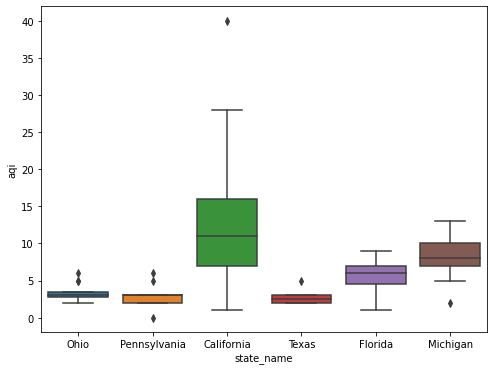

In [8]:
# Import seaborn as sns.
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=aqi_rre, x='state_name', y='aqi', ax=ax)
plt.show()

**Question:** Based on the data and your visualizations, which state(s) do you suspect will be most affected by this policy?

- California: The mean and a signficant portion of the boxplot range over 10.
- Michigan: While the mean is below 10, the boxplot ranges above 10.

### Construct a confidence interval for the RRE state with the highest mean AQI

Recall the 4-step process in constructing a confidence interval:

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error. 
4.   Calculate the interval.

### Construct your sample statistic

To contruct your sample statistic, find the mean AQI for your state.

In [9]:
# Find the mean aqi for your state.
aqi_ca = aqi.loc[aqi['state_name']=='California']

sample_mean = aqi_ca['aqi'].mean()
sample_mean

12.121212121212121

### Choose your confidence level

Choose your confidence level for your analysis. The most typical confidence level chosen is 95%; however, you can choose 90% or 99% if you want decrease or increase (respectively) your level of confidence about your result.

In [10]:
# Input your confidence level here:
c_l = 0.95
c_l

0.95

### Find your margin of error (ME)

Recall **margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate your margin of error:

- Find your z-value. 
- Find the approximate z for common confidence levels.
- Calculate your **standard error** estimate. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


In [11]:
# Calculate your margin of error.
# Begin by identifying the z associated with your chosen confidence level.
z_value = 1.96
# Next, calculate your standard error.
standard_error = aqi_ca['aqi'].std() / np.sqrt(len(aqi_ca))
print(f'Standard error is {standard_error:0.4f}')

# Lastly, use the preceding result to calculate your margin of error.
margin_error = z_value * standard_error
print(f'Margin of error is {margin_error:0.4f}')

Standard error is 0.8987
Margin of error is 1.7615


### Calculate your interval

Calculate both a lower and upper limit surrounding your sample mean to create your interval.

In [12]:
# Calculate your confidence interval (upper and lower limits).
lwr_limit = sample_mean - margin_error
upr_limit = sample_mean + margin_error

print(f'The lower and upper limits are [{lwr_limit:0.4f}, {upr_limit:0.4f}]')

The lower and upper limits are [10.3597, 13.8827]


### Alternative: Construct the interval using `scipy.stats.norm.interval()`

`scipy` presents a simpler solution to developing a confidence interval. To use this, first import the `stats` module from `scipy`.

In [13]:
# Import stats from scipy.
intervals_95 = stats.norm.interval(alpha=c_l, 
                                loc=sample_mean, 
                                scale=standard_error)
print(f'The lower and upper limits with 95% confidence level are {intervals_95}')

The lower and upper limits with 95% confidence level are (10.359751399400034, 13.882672843024208)


## Step 4: Results and evaluation

### Recalculate your confidence interval

Provide your chosen `confidence_level`, `sample_mean`, and `standard_error` to `stats.norm.interval()` and recalculate your confidence interval.

In [14]:
# Import stats from scipy.
intervals_99 = stats.norm.interval(alpha=0.99, 
                                loc=sample_mean, 
                                scale=standard_error)
print(f'The lower and upper limits with 99% confidence level are {intervals_99}')

The lower and upper limits with 99% confidence level are (9.806260326136803, 14.43616391628744)


# Considerations

**What are some key takeaways that you learned from this lab?**

- Based on the mean AQI for RRE states, California and Michigan were most likely to have experienced a mean AQI above 10.
- With California experiencing the highest sample mean AQI in the data, it appears to be the state most likely to be affected by the policy change. 
- Constructing a confidence interval allowed you to estimate the sample mean AQI with a certain degree of confidence.

**What findings would you share with others?**

- Present this notebook to convey the analytical process and describe the methodology behind constructing the confidence interval. 
- Convey that a confidence interval at the 95% level of confidence from this sample data yielded `[10.36 , 13.88]`, which provides the interpretation "given the observed sample AQI measurements, there is a 95% confidence that the population mean AQI for California was between 10.36 and 13.88. This range is notably greater than 10."
- Share how varying the confidence level changes the interval. For example, if you varied the confidence level to 99%, the confidence interval would become `[9.80 , 14.43]`.

**What would you convey to external stakeholders?**

- Explain statistical significance at a high level. 
- Describe California's observed mean AQI and suggest focusing on that state.
- Share the result of the 95% confidence interval, describing what this means relative to the threshold of 10.
- Convey any potential shortcomings of this analysis, such as the short time period being referenced. 

**References**

[seaborn.boxplot — seaborn 0.12.1 documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). (n.d.). 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.